In [1]:
import manual_align
import getLines
import matplotlib.pyplot as plt
import pickle
import random
import numpy as np

plt.rcParams["figure.figsize"] = (5, 5)

Using TensorFlow backend.


In [415]:
import importlib
importlib.reload(getLines)
importlib.reload(manual_align)
imgs2 = pickle.load(open("line detection\\testdata", "rb"))

def intersection(line1, line2):
    """Finds the intersection of two lines given in Hesse normal form.

    Returns closest integer pixel locations.
    See https://stackoverflow.com/a/383527/5087436
    """
    rho1, theta1 = line1[0]
    rho2, theta2 = line2[0]
    A = np.array([
        [np.cos(theta1), np.sin(theta1)],
        [np.cos(theta2), np.sin(theta2)]
    ])
    b = np.array([[rho1], [rho2]])
    x0, y0 = np.linalg.solve(A, b)
    #x0, y0 = x0, np.round(y0))
    return [[x0, y0]]

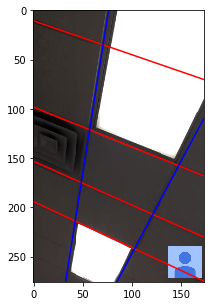

(6, 1, 2)
[[-1.36076113]
 [-1.93231762]
 [-0.48687075]]
flip
(array([[-0.90055478,  0.43361018,  0.03135759],
       [-0.36548542, -0.71606025, -0.59470843],
       [-0.23541771, -0.54702827,  0.80332968]]), array([[ 0.79678253],
       [ 0.24534857],
       [ 0.32367487]]))
Wall time: 138 ms


In [417]:
%%time
import cProfile

def sort_screen(lines):
    l = list(lines)
    l.sort(key = lambda l: l[0, 0])
    return np.array(l)


test = random.choice(imgs2)[0]

camera_matrix = np.array([[319, 0, 90],
                          [0, 319, 140],
                          [0, 0, 1]])
import cv2


def transform_from_lines(l1, l2):
    l1, l2 = sort_screen(l1), sort_screen(l2)
    
    object_pts = []
    image_pts = []
    for i, line1 in enumerate(l1):
        for j, line2 in enumerate(l2):
            x = intersection(line1, line2)[0]
            image_pts.append([x[0], x[1]])
            object_pts.append([[i + 0.0], [j + 0.0], [0]])


    object_pts = np.array(object_pts)
    image_pts = np.array(image_pts)

    res = cv2.solvePnP(object_pts, image_pts, camera_matrix, np.zeros((5, 1)))
    
    rotation = cv2.Rodrigues(res[2])[0].transpose()
    translation = np.dot(np.eye(3), res[1])
    
    return rotation, translation
    

def transform(image):
   
    try:
        l1, l2 = getLines.get_lines(image, graph=True, liveCV=False)
        getLines.cvShow(np.concatenate([l1, l2]), image.copy())
        rotation, translation = transform_from_lines(l1, l2)
        print(translation)
        if translation[2, 0] < 0:
            rotation, translation = transform_from_lines(l2, l1)
            print("flip")
        return rotation, translation
    except Exception as error:
        print(error)
        


print(transform(test))

In [414]:
outs = [transform(im[0]) for im in imgs2]


(5, 1, 2)
[[ 1.00770061]
 [-0.10490414]
 [ 1.07604939]]
(5, 1, 2)
[[-0.76764168]
 [-1.08438836]
 [ 0.36542678]]
(7, 1, 2)
[[-0.48539416]
 [-2.53958348]
 [-1.12696626]]
flip
(7, 1, 2)
[[ 0.85597158]
 [-0.37227383]
 [ 1.10852874]]
(6, 1, 2)
[[-0.50119548]
 [-1.21487234]
 [ 0.27141529]]
(7, 1, 2)
[[ 0.8877506 ]
 [-0.40248479]
 [ 1.09706484]]
(7, 1, 2)
[[ 0.89129486]
 [-0.401961  ]
 [ 1.09721076]]
(7, 1, 2)
[[ 0.88652185]
 [-0.38908734]
 [ 1.10179766]]
(6, 1, 2)
[[ 0.8596033 ]
 [-0.40883073]
 [ 1.07890171]]
(7, 1, 2)
[[-0.84755146]
 [ 0.3360294 ]
 [ 1.00482633]]
(6, 1, 2)
[[ 0.82706899]
 [-0.38828572]
 [ 1.0899236 ]]
(5, 1, 2)
[[-0.80921125]
 [-1.05548169]
 [ 0.37870487]]
(6, 1, 2)
[[-0.52994132]
 [-2.59179581]
 [-1.10162496]]
flip
(5, 1, 2)
[[-0.83203096]
 [-1.0625408 ]
 [ 0.39676651]]
(6, 1, 2)
[[-0.5683241 ]
 [-2.64717154]
 [-1.09435005]]
flip
(6, 1, 2)
[[-0.55018455]
 [-2.63194374]
 [-1.07345202]]
flip
(6, 1, 2)
[[-0.55830402]
 [-2.66165768]
 [-1.12080669]]
flip
(7, 1, 2)
[[-0.55754045

(6, 1, 2)
[[ 0.8017106 ]
 [-0.16632516]
 [ 0.16679939]]
(5, 1, 2)
[[ 0.80269426]
 [-0.15639593]
 [ 0.15288125]]
(6, 1, 2)
[[ 0.83191554]
 [-0.18278629]
 [ 0.14705906]]
(7, 1, 2)
[[ 0.75756767]
 [-0.1918906 ]
 [ 0.17725483]]
(7, 1, 2)
[[-1.59685375]
 [-1.89898603]
 [-0.97921488]]
flip
(8, 1, 2)
[[-1.61063588]
 [-1.93279706]
 [-0.95569356]]
flip
(7, 1, 2)
[[-1.58989314]
 [-1.86768519]
 [-1.07864391]]
flip
(7, 1, 2)
[[ 1.00783109]
 [-0.14439461]
 [ 0.17048736]]
(7, 1, 2)
[[-1.67083095]
 [-2.12135479]
 [-0.89105353]]
flip
(7, 1, 2)
[[-1.67083095]
 [-2.12135479]
 [-0.89105353]]
flip
(7, 1, 2)
[[ 0.76720997]
 [-0.21660225]
 [ 0.21819443]]
(6, 1, 2)
[[-1.50252869]
 [-1.85834745]
 [-1.0550551 ]]
flip
(6, 1, 2)
[[ 0.96055861]
 [-0.18913428]
 [ 0.19386774]]
(6, 1, 2)
[[-1.50252869]
 [-1.85834745]
 [-1.0550551 ]]
flip
(9, 1, 2)
[[ 0.4729421 ]
 [-0.84309762]
 [ 0.18072388]]
(7, 1, 2)
[[-1.52360553]
 [-1.85131265]
 [-1.07941973]]
flip
(5, 1, 2)
[[-0.48930654]
 [-1.80182917]
 [ 0.49414804]]
(6, 1, 2

(6, 1, 2)
[[ 0.76033864]
 [-0.3529256 ]
 [ 1.44716476]]
(7, 1, 2)
[[ 0.84492248]
 [-0.58697798]
 [ 1.42318021]]
(6, 1, 2)
[[ 0.78535771]
 [-0.34678525]
 [ 1.43109173]]
(6, 1, 2)
[[ 0.78382488]
 [-0.34422533]
 [ 1.41904465]]
(5, 1, 2)
[[ 0.26688141]
 [ 1.21464305]
 [-3.13847294]]
flip
(6, 1, 2)
[[ 0.88954103]
 [-0.70025329]
 [ 1.40108921]]
(9, 1, 2)
[[ 0.71445684]
 [-0.36780613]
 [ 1.41608954]]
(6, 1, 2)
[[-0.22457777]
 [-2.63963378]
 [-0.93906295]]
flip
(6, 1, 2)
[[-0.28549086]
 [-2.6026842 ]
 [-0.88296444]]
flip
(6, 1, 2)
[[ 0.76709673]
 [-0.13607013]
 [ 1.27488113]]
(7, 1, 2)
[[ 0.77146344]
 [-0.1859773 ]
 [ 1.24277576]]
(7, 1, 2)
[[ 0.78950666]
 [-0.13761217]
 [ 1.22144508]]
(7, 1, 2)
[[-0.41771405]
 [-2.54565491]
 [-0.81332859]]
flip
(6, 1, 2)
[[ 0.80801282]
 [-0.12394106]
 [ 1.1358545 ]]
(7, 1, 2)
[[ 0.81998803]
 [-0.11136903]
 [ 1.13136747]]
(7, 1, 2)
[[ 0.83354201]
 [-0.08475298]
 [ 1.12945551]]
(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: erro

c:\users\hasti\anaconda3\envs\neuralnets\lib\site-packages\sklearn\cluster\affinity_propagation_.py:134: RuntimeWarning: invalid value encountered in subtract
  tmp -= np.sum(tmp, axis=0)
c:\users\hasti\anaconda3\envs\neuralnets\lib\site-packages\sklearn\cluster\affinity_propagation_.py:145: RuntimeWarning: invalid value encountered in greater
  E = (np.diag(A) + np.diag(R)) > 0
c:\users\hasti\anaconda3\envs\neuralnets\lib\site-packages\sklearn\cluster\affinity_propagation_.py:161: RuntimeWarning: invalid value encountered in greater
  I = np.where(np.diag(A + R) > 0)[0]


zero-dimensional arrays cannot be concatenated
(2, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP

Expected n_samples >= n_components but got n_components = 2, n_samples = 1
Expected n_samples >= n_components but got n_components = 2, n_samples = 1
(6, 1, 2)
[[ 0.94435041]
 [-0.20764235]
 [ 0.98095145]]
(8, 1, 2)
[[-0.62523515]
 [-2.48650968]
 [-1.12678179]]
flip
(7, 1, 2)
[[-0.64387085]
 [-2.37435004]
 [-0.92724207]]
flip
(6, 1, 2)
[[-0.64741212]
 [-2.38339234]
 [-0.921926  ]]
flip
(6, 1, 2)
[[ 1.00107511]
 [ 0.10075067]
 [ 0.87632181]]
(8, 1, 2)
[[-0.61268632]
 [-2.44402835]
 [-1.01721698]]
flip
(7, 1, 2)
[[ 0.88971789]
 [-0.24415322]
 [ 0.99950138]]
(6, 1, 2)
[[-0.65462299]
 [-2.38800702]
 [-0.90901333]]
flip
(6, 1, 2)
[[ 0.88532656]
 [-0.13285756]
 [ 0

In [411]:
translations = np.array([out[1] for out in outs if out])
translations[:, 0] %= 1
translations[:, 1] %= 1

rotations = np.array([out[0] for out in outs if out])

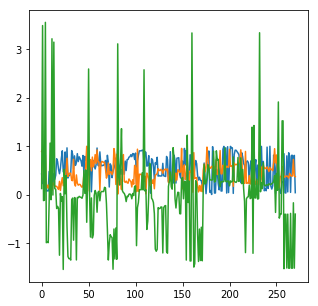

In [412]:
plt.plot(translations[:, :, 0])
plt.show()


In [198]:
import scipy.ndimage.filters

In [381]:
len(outs)

335

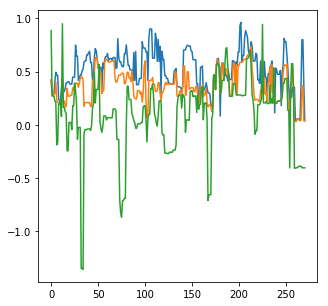

In [398]:
plt.plot(scipy.ndimage.filters.median_filter(translations[:, :, 0], 3))
plt.show()

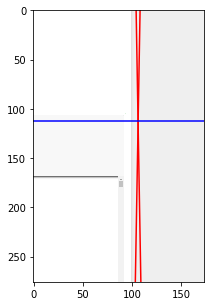

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



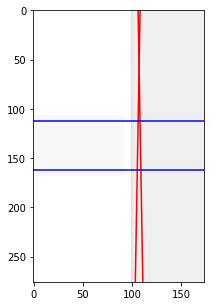

(4, 1, 2)
[ 0.40411806 -0.56538772  6.98498165]


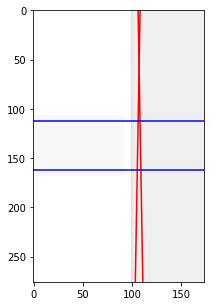

(4, 1, 2)
[ 0.40411806 -0.56538772  6.98498165]


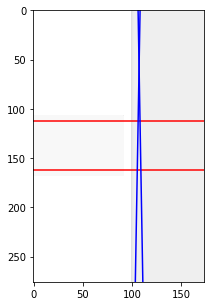

(4, 1, 2)
[ 0.40411806 -0.56538772  6.98498165]


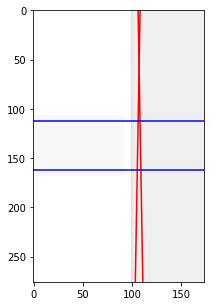

(4, 1, 2)
[ 0.40411806 -0.56538772  6.98498165]


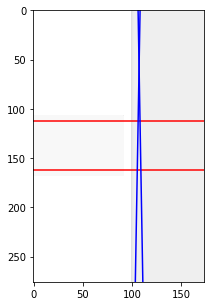

(4, 1, 2)
[ 0.40411806 -0.56538772  6.98498165]


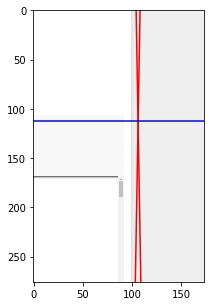

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



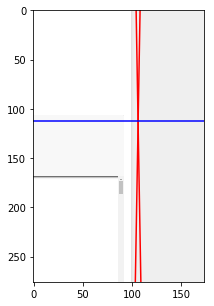

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



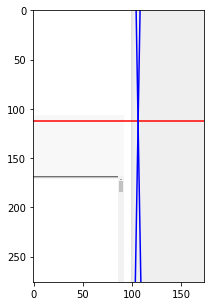

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



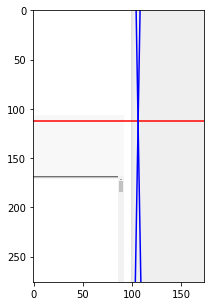

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



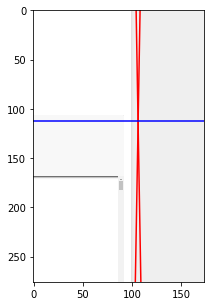

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



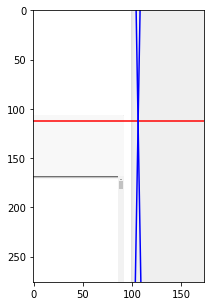

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



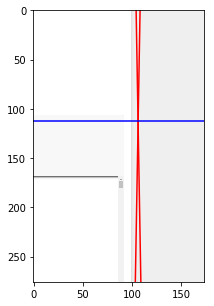

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



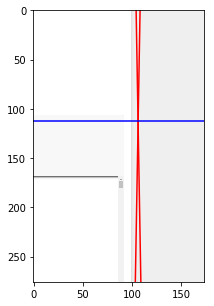

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



Exception ignored in: <bound method Image.__del__ of <PIL.Image.Image image mode=RGB size=519x826 at 0x25D9B171518>>
Traceback (most recent call last):
  File "c:\users\hasti\anaconda3\envs\neuralnets\lib\site-packages\PIL\Image.py", line 571, in __del__
    def __del__(self):
KeyboardInterrupt


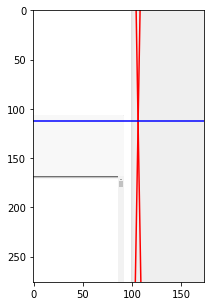

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



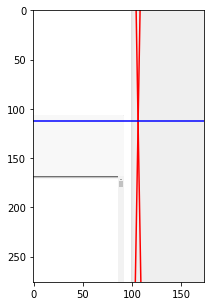

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



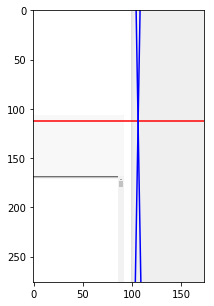

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



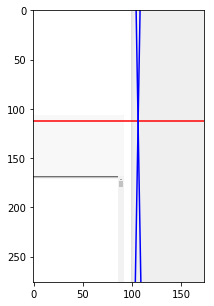

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



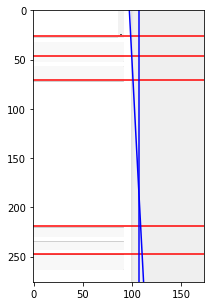

(7, 1, 2)
[ 0.14605601 -2.4099882   5.06296287]


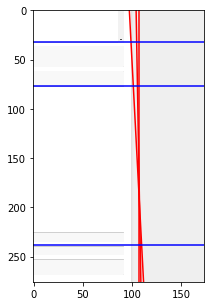

(6, 1, 2)
[ 0.0945028  -1.24623308  2.63058446]


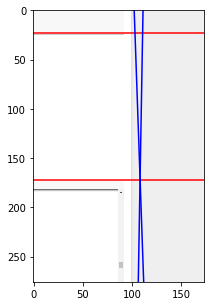

(4, 1, 2)
[ 0.13617758 -0.88012766  2.84881543]


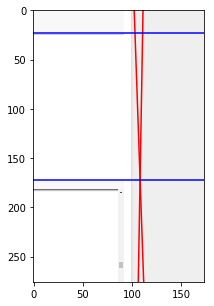

(4, 1, 2)
[ 0.13617758 -0.88012766  2.84881542]


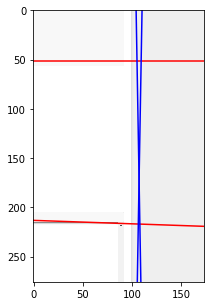

(4, 1, 2)
[ 0.48662386  0.05064301 -0.50624991]


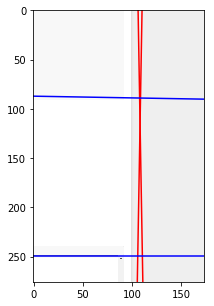

(4, 1, 2)
[ 0.10698586 -0.35262718  1.84430489]


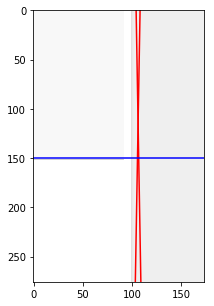

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



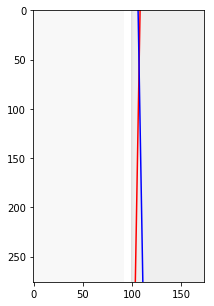

(2, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



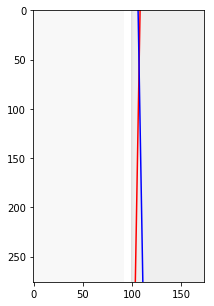

(2, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



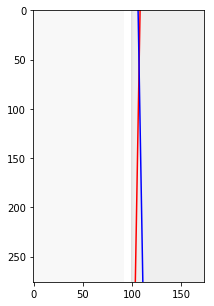

(2, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



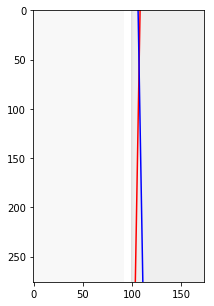

(2, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



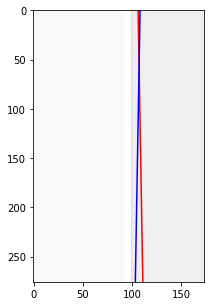

(2, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



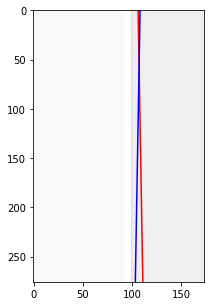

(2, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



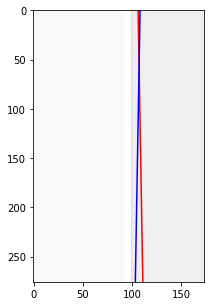

(2, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



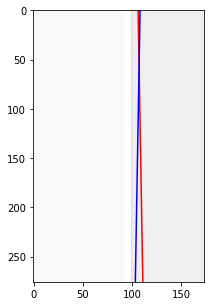

(2, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



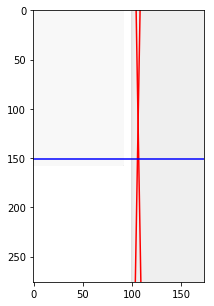

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



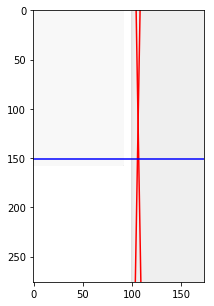

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



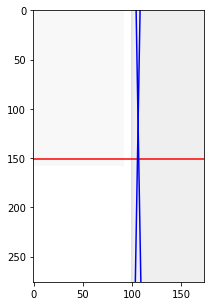

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



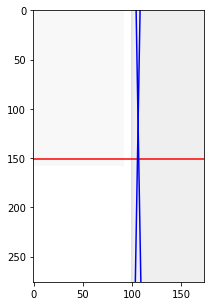

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



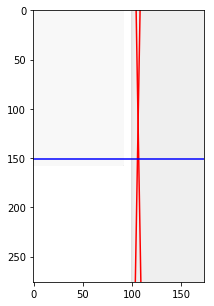

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



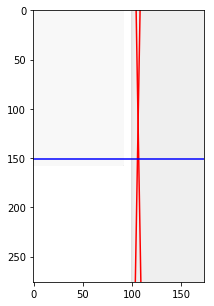

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



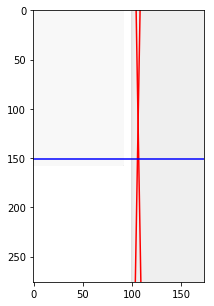

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



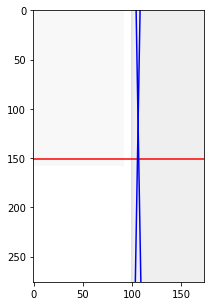

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



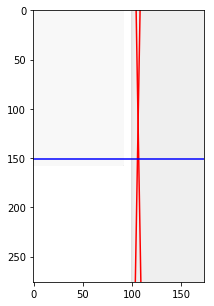

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



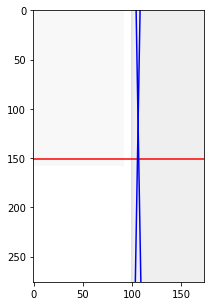

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



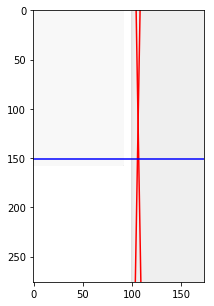

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



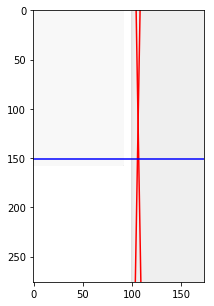

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



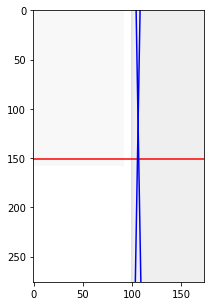

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



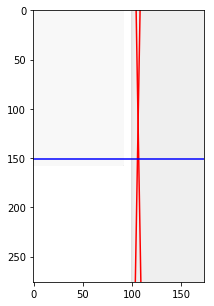

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



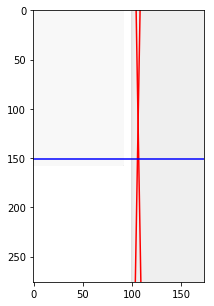

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



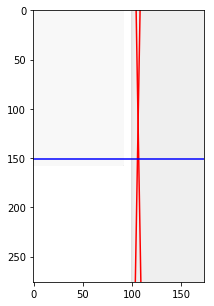

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



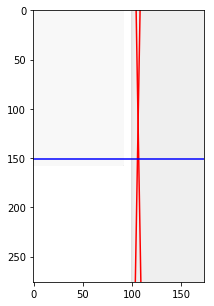

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



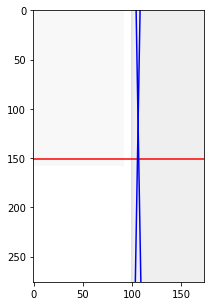

(3, 1, 2)
C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:65: error: (-215) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, 5), ipoints.checkVector(2, 6)) in function cv::solvePnP



KeyboardInterrupt: 

In [248]:
from PIL import ImageGrab
bb = [1546, 397, 2065, 1223]
while True:
    test = np.array(ImageGrab.grab(bb))
    res = transform(test[::3, ::3])
    if res:
        print(res[2][:, 0])
    if cv2.waitKey(1) & 0xFF == ord('q'):
        
        break

In [ ]:
%%time
import cProfile

def sort_screen(lines):
    l = list(lines)
    l.sort(key = lambda l: l[0, 0])
    return np.array(l)


test = random.choice(imgs2)[0]

camera_matrix = np.array([[319, 0, 90],
                          [0, 319, 140],
                          [0, 0, 1]])
import cv2


def transform_from_lines(l1, l2):
    l1, l2 = sort_screen(l1), sort_screen(l2)
    
    object_pts = []
    image_pts = []
    for i, line1 in enumerate(l1):
        for j, line2 in enumerate(l2):
            x = intersection(line1, line2)[0]
            image_pts.append([x[0], x[1]])
            object_pts.append([[i + 0.0], [j + 0.0], [0]])


    object_pts = np.array(object_pts)
    image_pts = np.array(image_pts)

    res = cv2.solvePnP(object_pts, image_pts, camera_matrix, np.zeros((5, 1)))
    
    rotation = cv2.Rodrigues(res[2])[0].transpose()
    translation = np.dot((-rotation), res[1])
    
    return rotation, translation
    

def transform(image):
   
    try:
        l1, l2 = getLines.get_lines(image, graph=True, liveCV=False)
        getLines.cvShow(np.concatenate([l1, l2]), image.copy())
        rotation, translation = transform_from_lines(l1, l2)
        print(translation)
        if translation[2, 0] < 0:
            rotation, translation = transform_from_lines(l2, l1)
        return rotation, translation
    except Exception as error:
        print(error)
        


print(transform(test))